# Playground

A place that hosts different tests and experiments necessary during the development of the notebooks.


## Comparing the FID calculations (old and new)

frechet_inception.distance.py is used as an evaluation step during training, whereas fid.py was developed to be run after the training is done. The two scripts should produce the same results.

In [1]:
import numpy as np
import tensorflow as tf
import fid as fid_new
import frechet_inception_distance_OLD as fid_old
from dataset_utils import DatasetLoader
from ModelProxy import Pix2PixModelProxy

dataset_loader = DatasetLoader("all", "test", limit=500)
pix2pix = Pix2PixModelProxy("models/pix2pix")

test_ds = dataset_loader.dataset.batch(100)


In [2]:
real_images = []
fake_images = []
for i, batch in test_ds.enumerate():
    target_images = tf.gather(batch, 3) 
    generated_images = pix2pix.generate(2, 3, batch)
    real_images.append(target_images.numpy())
    fake_images.append(generated_images.numpy())

real_images = np.concatenate(real_images)
fake_images = np.concatenate(fake_images)
value_old = fid_old.compare(real_images, fake_images)
value_new = fid_new.calculate_fid(real_images, fake_images)
value_new_split = fid_new.calculate_fid_from_metrics(
    fid_new.calculate_metrics_for_dataset(real_images),
    fid_new.calculate_metrics_for_dataset(fake_images)
)
print(f"Old FID: {value_old}")
print(f"New FID: {value_new}")
print(f"New FID (split): {value_new_split}")

In [3]:
from image_utils import show_single_image

show_single_image(real_images[0], "real 0")
show_single_image(fake_images[0], "fake 0")


## Comparing the resizing methods (TF vs skimage)

In [4]:
import skimage.transform as sk_transforms
tf_resized = tf.image.resize(real_images[0][..., 0:3], (299, 299), method="nearest")
sk_resized = sk_transforms.resize(real_images[0][..., 0:3], (299, 299, 3), order=0)

l1_distance = np.mean(np.abs(tf_resized.numpy() - sk_resized))
print(f"L1 distance: {l1_distance}")

show_single_image(tf_resized.numpy(), "tf_resized")
show_single_image(sk_resized, "sk_resized")



## Creating a checkerboard pattern


In [14]:
import tensorflow as tf
from matplotlib import pyplot as plt

checkerboard_image = tf.pad(tf.tile(tf.constant([[0, 1], [1, 0]], dtype=tf.float32), [4, 4]), [[1, 1], [1, 1]], constant_values=1)
print(checkerboard_image)
plt.imshow(checkerboard_image * 0.3 + 0.7, cmap="gray", vmin=0, vmax=1)
plt.axis("off")
plt.show()


## Generating image with samples from the Larger database



In [1]:
from math import ceil

dataset_sizes = [912, 216, 294, 408, 12372]
train_sizes = [int(ceil(size * 0.85)) for size in dataset_sizes]
test_sizes = [size - train_size for size, train_size in zip(dataset_sizes, train_sizes)]
print("train_sizes", train_sizes)
print("test_sizes", test_sizes)

starting_index_train = [0] + [sum(train_sizes[:i]) for i in range(1, len(train_sizes))]
starting_index_test = [0] + [sum(test_sizes[:i]) for i in range(1, len(test_sizes))]
print("starting_index_train", starting_index_train)
print("starting_index_test", starting_index_test)

train_sizes [776, 184, 250, 347, 10517]
test_sizes [136, 32, 44, 61, 1855]
starting_index_train [0, 776, 960, 1210, 1557]
starting_index_test [0, 136, 168, 212, 273]


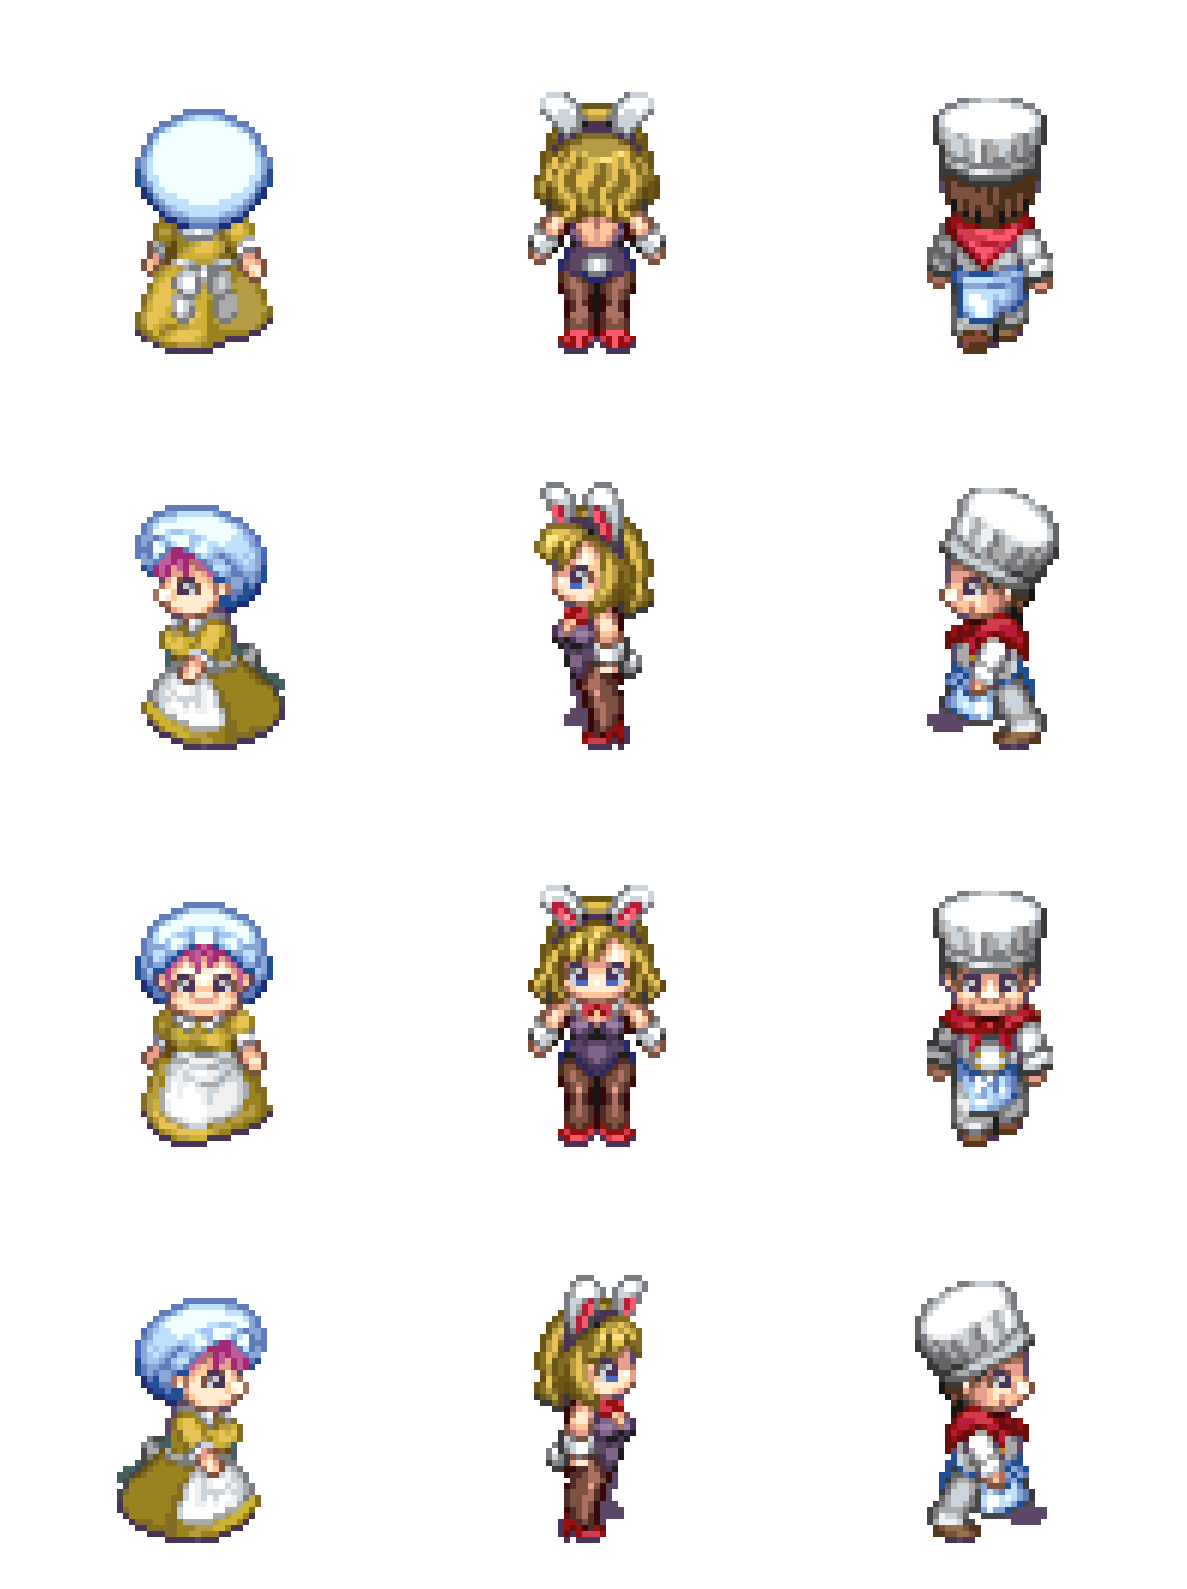

In [3]:
from matplotlib import pyplot as plt
from dataset_utils import DatasetLoader

train_dataset_loader = DatasetLoader("all", "train")
test_dataset_loader = DatasetLoader("all", "test")

# train_indices = [1557+2, 1557+7876, 1557+9489, 0+99]
# test_indices = [273+74, 273+1551, 273+1709, ]
train_indices = []
test_indices = [168+23, 168+3, 168+5]

# gets images with train and test indices in the columns and the four different directions in the rows
train_images = [train_dataset_loader.load_paired_images(number) for number in train_indices]
test_images = [test_dataset_loader.load_paired_images(number) for number in test_indices]
all_images = train_images + test_images

# shows an image with the four different directions in the rows and the train and test images in the columns
rows = 4
cols = len(all_images)
fig = plt.figure(figsize=(4*cols, 4*rows))
for i in range(rows):
    for j in range(cols):
        plt.subplot(rows, cols, i*cols + j + 1, facecolor='w')
        plt.imshow(all_images[j][i] * 0.5 + 0.5, interpolation="nearest")
        plt.axis("off")
fig.patch.set_alpha(0.0)
plt.tight_layout()
plt.show()
# plt.savefig("larger-dataset-examples.png", transparent=True)

## Generating a checkerboard pattern


tf.Tensor(
[[[0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]
  [0.  0.  0.  0. ]]

 [[0.  0.  0.  0. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.  0.  0.  0. ]]

 [[0.  0.  0.  0. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [0.  0.  0.  0. ]]

 [[0.  0.  0.  0. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.  0.  0.  0. ]]

 [[0.  0.  0.  0. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
  [1.  1.  1.  1. ]
  [0.8 0.8 0.8 1. ]
 

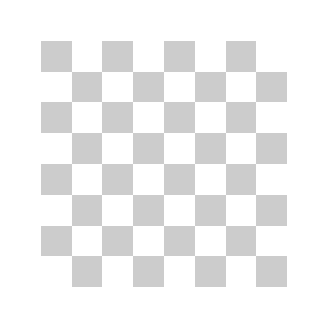

In [12]:
import tensorflow as tf
from matplotlib import pyplot as plt

def checkerboard_pattern():
    return tf.pad(tf.tile(tf.constant([[0, 1], [1, 0]], dtype=tf.float32), [4, 4]), [[1, 1], [1, 1]],
                  constant_values=1) * 0.2 + 0.8

def new_checkerboard_pattern():
    checkers = tf.tile(tf.constant([[0, 1], [1, 0]], dtype=tf.float32), [4, 4])
    rgba_checkers = tf.stack([checkers, checkers, checkers, tf.ones_like(checkers)], axis=-1) * 0.2 + 0.8
    return tf.pad(rgba_checkers, [[1, 1], [1, 1], [0, 0]], constant_values=0)

image = new_checkerboard_pattern()
print(image)
f = plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.axis("off")
plt.show()
f.patch.set_alpha(0.0)
f.savefig("output/checkerboard-pattern.png", transparent=True)


## Doing a random crop inside a valid area (where the image is not transparent)

2025-05-28 14:27:38.374158: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:563: Filling up shuffle buffer (this may take a while): 143 of 1200
2025-05-28 14:26:44.602149: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


Batch shape: (5, 4, 64, 64, 4) (b, d, s, s c)


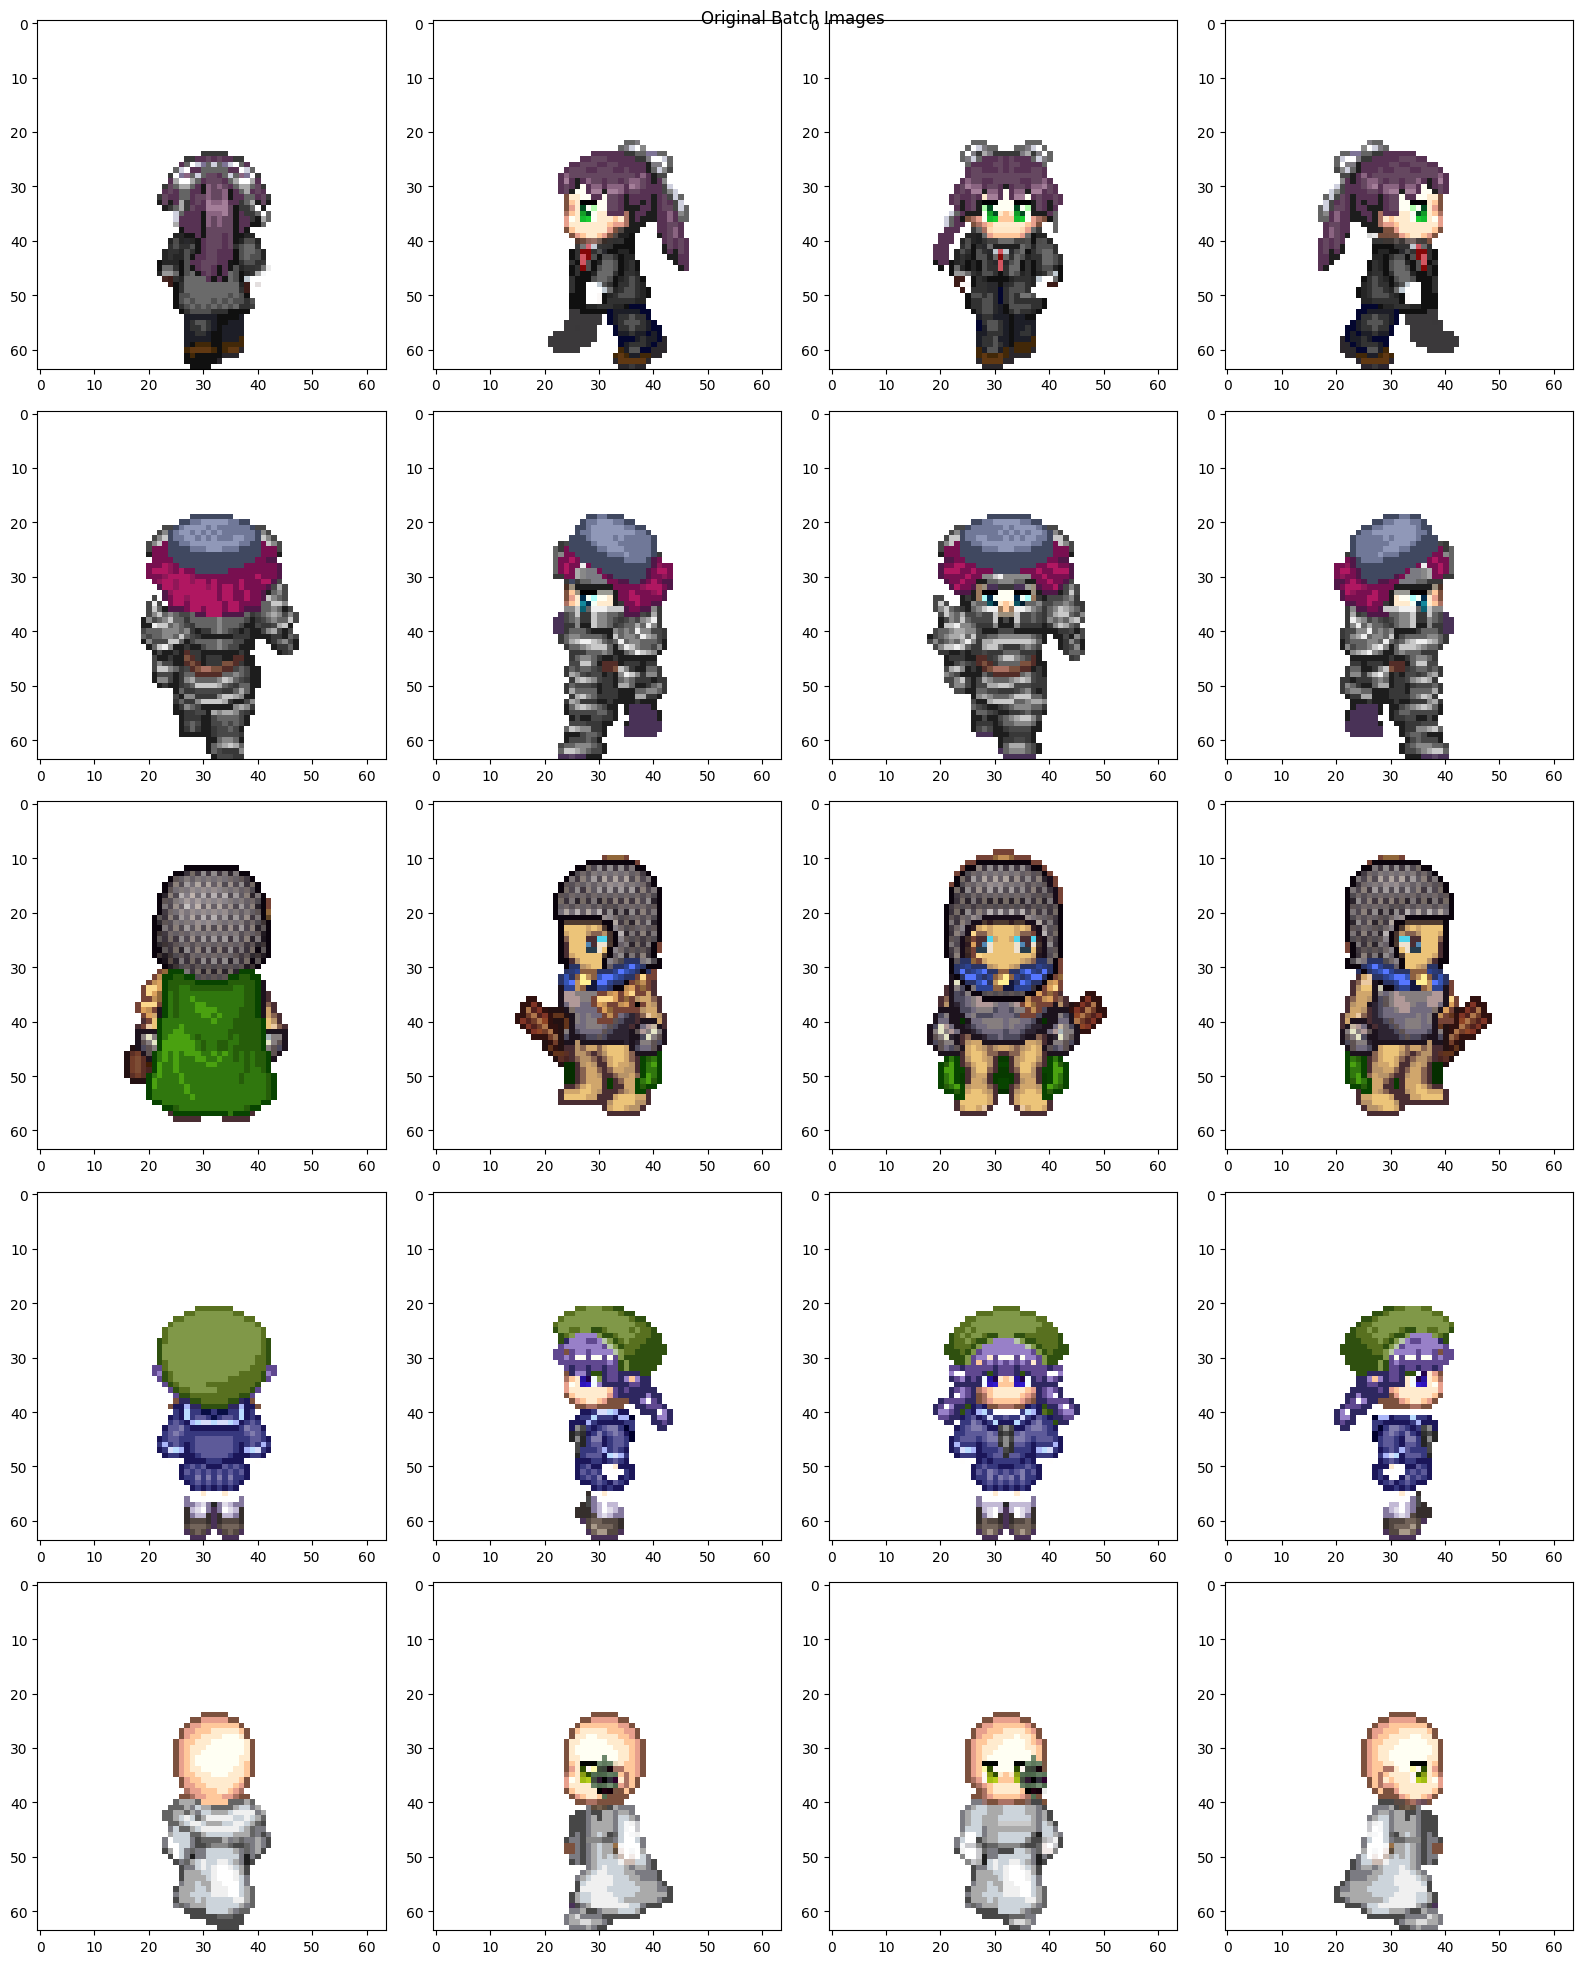

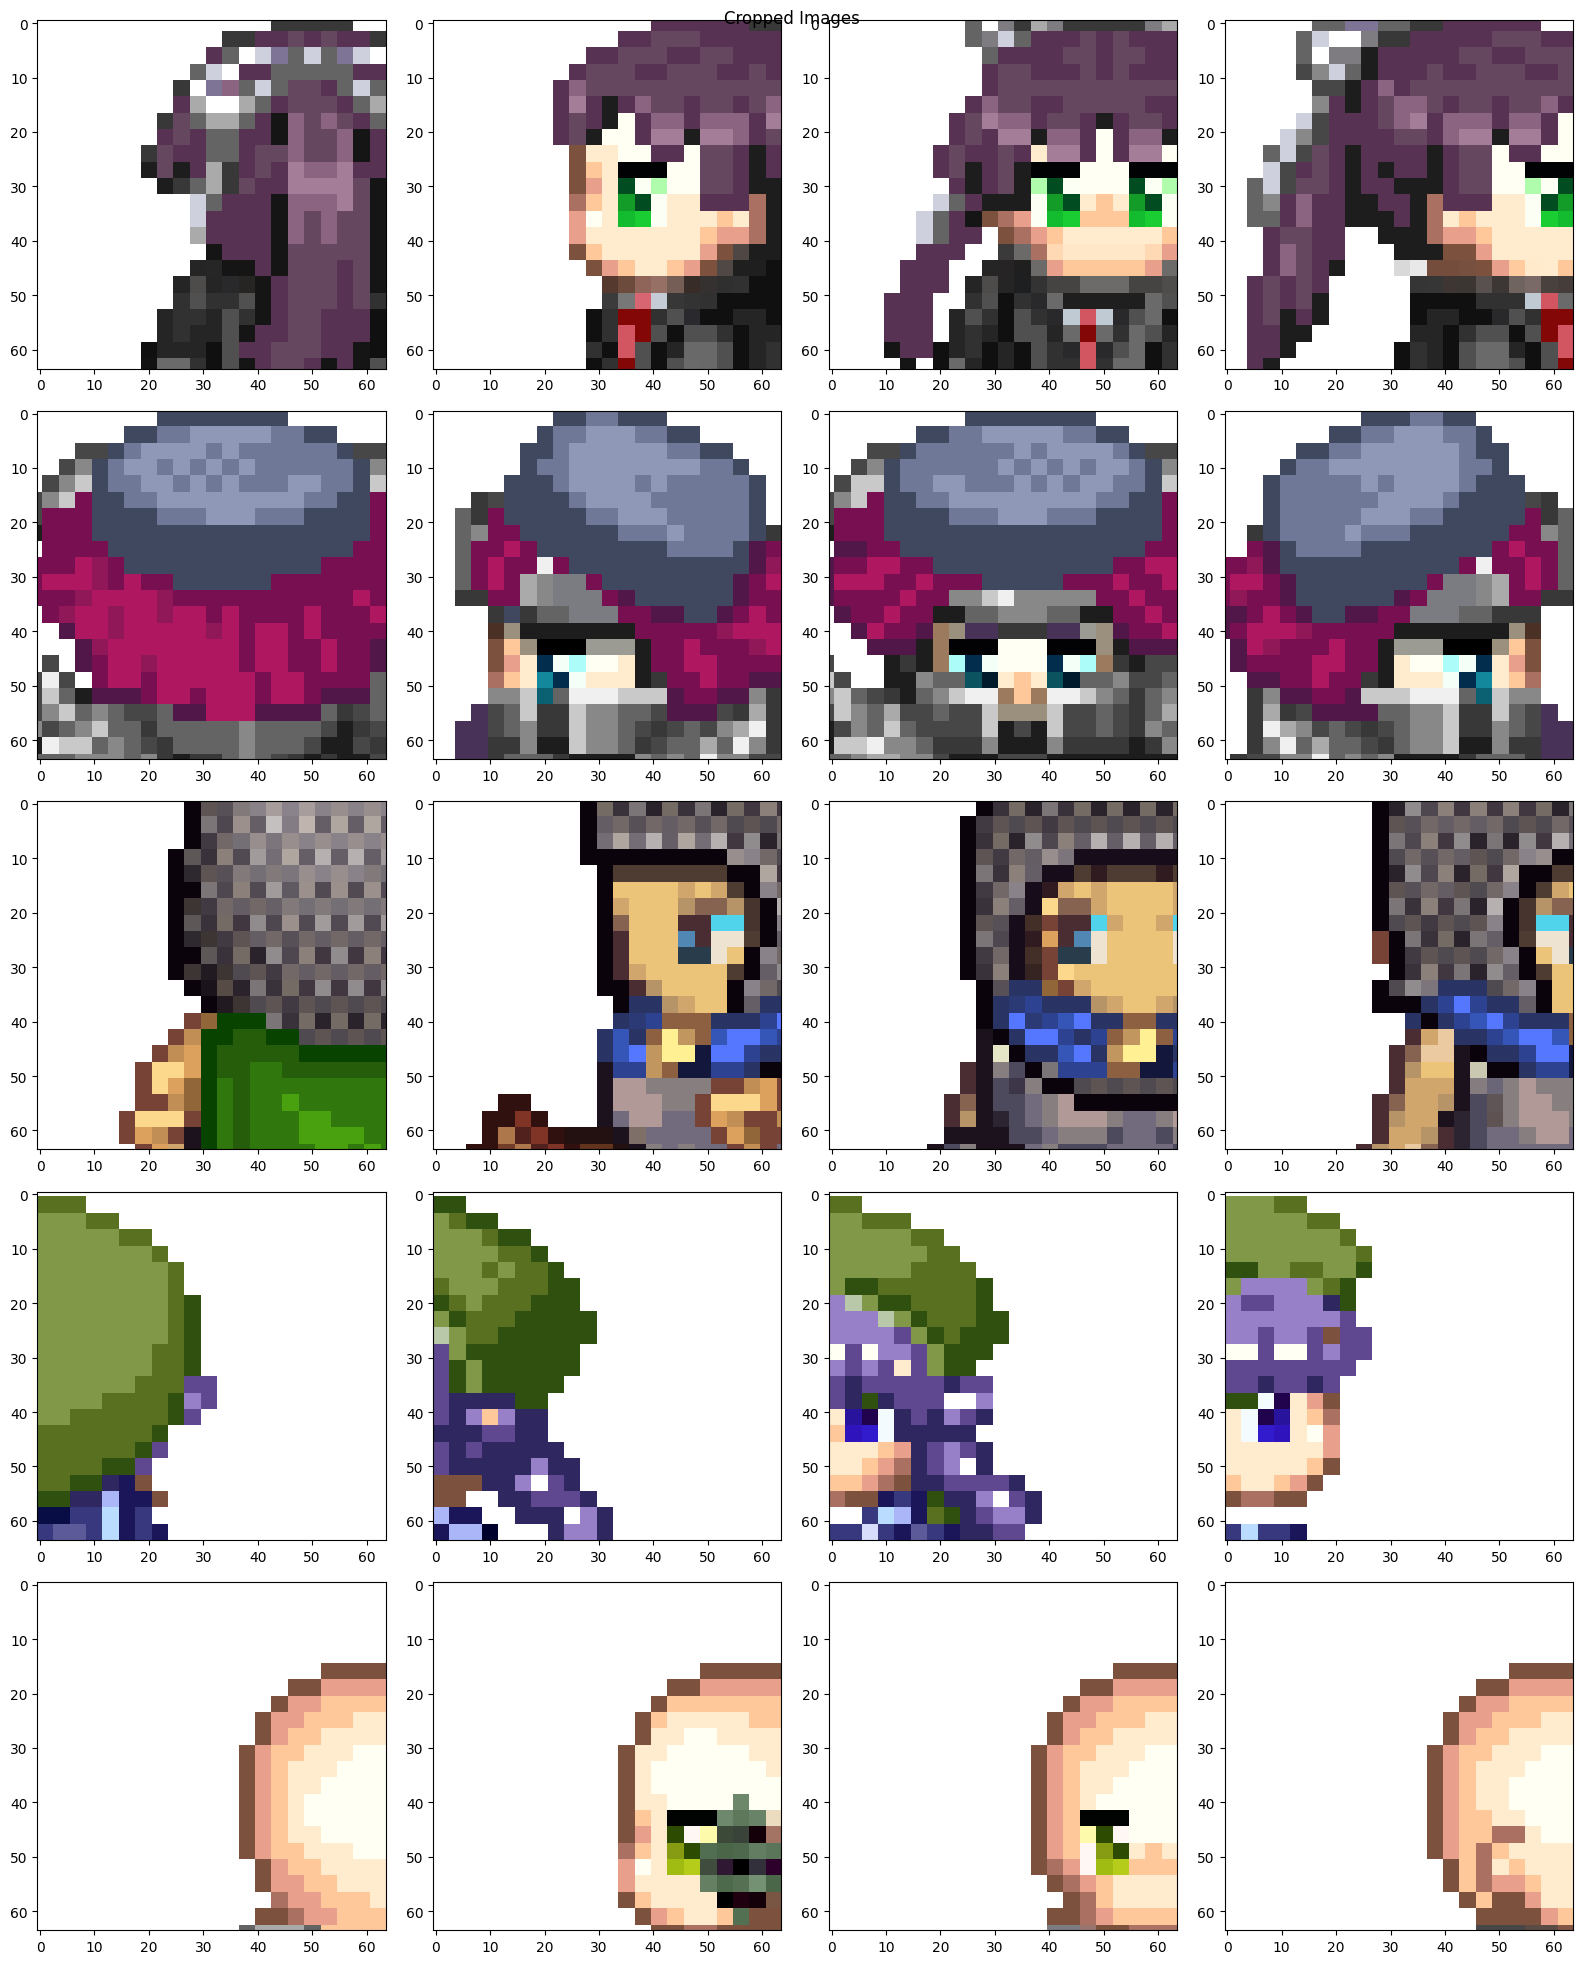

In [85]:
import matplotlib.pyplot as plt
import tensorflow as tf
from dataset_utils import DatasetLoader

# plots a grid of images from a 5D tensor (batch_size, domains, height, width, channels)
def display_grid_of_images(images_5d, title=None):
    images_shape = tf.shape(images_5d).numpy()
    rows = images_shape[0]
    cols = images_shape[1]
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
    for i in range(rows):
        for j in range(cols):
            ax = axes[i, j] if rows > 1 else axes[j]
            ax.imshow(images_5d[i, j].numpy())
            # ax.axis("off")
    if title:
        plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# resize the images to a new size (default 256x256), receives a 5d tensor
# with shape (batch_size, domains, height, width, channels=4)
def resize_images_5d(images, new_size=(256, 256)):
    # images.shape = (batch_size, domains, height, width, channels=4)
    batch_shape = tf.shape(images)
    batch_size, domains, height, width, channels = tf.unstack(batch_shape)
    images_4d = tf.reshape(images, [batch_size * domains, height, width, channels])
    resized_images_4d = tf.image.resize(images_4d, new_size, method="nearest")
    return tf.reshape(resized_images_4d, [batch_size, domains, new_size[0], new_size[1], channels])


# finds the bounding box that contains all the non-transparent pixels of all images in the batch|domain
# receives a 4d tensor with shape (batch_size|domains, height, width, channels=4)
def find_bounding_box_per_batch(images):
    # images.shape = (batch_size|domains, height, width, channels=4)
    pixel_is_opaque = images[..., 3] > -1
    # pixel_is_opaque.shape = (batch_size, height, width)
    non_transparent_mask = tf.reduce_any(pixel_is_opaque, axis=0)
    y_indices, x_indices = tf.where(non_transparent_mask)[:, 0], tf.where(non_transparent_mask)[:, 1]
    y_indices, x_indices = tf.cast(y_indices, tf.int32), tf.cast(x_indices, tf.int32)
    min_y, max_y = tf.reduce_min(y_indices), tf.reduce_max(y_indices)
    min_x, max_x = tf.reduce_min(x_indices), tf.reduce_max(x_indices)
    return tf.stack([min_y, max_y, min_x, max_x])


# performs a random crop of size (crop_size, crop_size) on images from all domains for each example
# in the batch. The images tensor is 5d (batch_size, domains, height, width, channels=4).
# each example in the batch is cropped to a random area that covers at least partially the bounding box
# of the non-transparent pixels in the images for that character in all domains.
def random_crop_5d(images, crop_size=64):
    # gets the bounding boxes for each example in the batch considering the images from all domains
    batch_size, domains, height, width, channels = tf.unstack(tf.shape(images))
    bounding_boxes = tf.map_fn(
        find_bounding_box_per_batch,
        images,
        parallel_iterations=batch_size,
        fn_output_signature=tf.TensorSpec(shape=[4], dtype=tf.int32)  # [min_y, max_y, min_x, max_x]
    )
    # print("Bounding boxes shape:", bounding_boxes.shape)
    # print("Bounding boxes:", bounding_boxes.numpy())
    bounding_boxes = tf.cast(bounding_boxes, tf.float32)

    # gets a random start_x and start_y for each example in the batch
    start_y = tf.random.uniform(
        [batch_size],
        minval=tf.maximum(0., bounding_boxes[:, 0] - crop_size // 2),
        maxval=tf.minimum(tf.cast(height - crop_size, tf.float32), bounding_boxes[:, 1] - crop_size // 2),
        dtype=tf.float32
    )
    start_x = tf.random.uniform(
        [batch_size],
        minval=tf.maximum(0., bounding_boxes[:, 2] - crop_size // 2),
        maxval=tf.minimum(tf.cast(width - crop_size, tf.float32), bounding_boxes[:, 3] - crop_size // 2),
        dtype=tf.float32
    )
    start_y = tf.cast(tf.floor(start_y), tf.int32)
    start_x = tf.cast(tf.floor(start_x), tf.int32)
    # print("Crop start_y:", start_y.numpy())
    # print("Crop start_x:", start_x.numpy())

    # effectively crops each image in the batch using the calculated start_x and start_y
    cropped_images = tf.map_fn(
        lambda idx: images[idx, :, start_y[idx]:start_y[idx] + crop_size, start_x[idx]:start_x[idx] + crop_size, :],
        tf.range(batch_size),
        dtype=tf.float32
    )

    return cropped_images



dataset_loader = DatasetLoader("all", "test")
test_ds = dataset_loader.dataset

for batch in test_ds.shuffle(1200).batch(5).take(1):
    batch = tf.transpose(batch, perm=[1, 0, 2, 3, 4])
    print("Batch shape:", batch.shape, "-> (b, d, s, s c)")
    # display the batch images in a row
    display_grid_of_images(batch * 0.5 + 0.5, "Original Batch Images")

    resized_images = resize_images_5d(batch, (192, 192))
    cropped_images = random_crop_5d(resized_images, crop_size=64)

    # print("Original shape:", batch.shape)
    # print("Resized shape:", resized_images.shape)
    # print("Cropped shape:", cropped_images.shape)

    # display the cropped images in a row
    display_grid_of_images(cropped_images * 0.5 + 0.5, "Cropped Images")





### Commented functions used while developing the random crop function above

Before creating a version that works with batches of domains of images (a 5d tensor), I created simpler versions of the involved functions that work with a 4d tensor (batch_size, height, width, channels=4). These functions are commented out below for reference.

In [ ]:


# def display_row_of_images(images, title=None):
#     fig, axes = plt.subplots(1, len(images), figsize=(16, 4))
#     for i, ax in enumerate(axes):
#         ax.imshow(images[i].numpy())
#         # ax.axis("off")
#     if title:
#         plt.suptitle(title)
#     plt.show()
#
# # resize the images to a new size (default 256x256)
# def resize_images(images, new_size=(256, 256)):
#     # images.shape = (batch_size, height, width, channels=4)
#     return tf.image.resize(images, new_size, method="nearest")


# def find_bounding_box(images):
#     # images.shape = (batch_size, height, width, channels=4)
#     pixel_is_opaque = images[..., 3] > -1
#     # pixel_is_opaque.shape = (batch_size, height, width)
#     opaque_pixel_indices = tf.cast(tf.where(pixel_is_opaque), tf.int32)
#     batch_indices, y_indices, x_indices = opaque_pixel_indices[:, 0], opaque_pixel_indices[:, 1], opaque_pixel_indices[:, 2]
#
#     # creates a mask for each image in the batch
#     batch_size = tf.shape(images)[0]
#     batch_mask = tf.cast(tf.one_hot(batch_indices, batch_size), dtype=tf.bool)
#
#     min_y = tf.reduce_min(tf.where(batch_mask, tf.expand_dims(y_indices, -1), tf.fill(tf.shape(batch_mask), tf.int32.max)), axis=0)
#     max_y = tf.reduce_max(tf.where(batch_mask, tf.expand_dims(y_indices, -1), tf.fill(tf.shape(batch_mask), tf.int32.min)), axis=0)
#     min_x = tf.reduce_min(tf.where(batch_mask, tf.expand_dims(x_indices, -1), tf.fill(tf.shape(batch_mask), tf.int32.max)), axis=0)
#     max_x = tf.reduce_max(tf.where(batch_mask, tf.expand_dims(x_indices, -1), tf.fill(tf.shape(batch_mask), tf.int32.min)), axis=0)
#     return tf.stack([min_y, max_y, min_x, max_x], axis=1)

# # crop the images to a random area of 64x64 that covers at least partially the bounding box
# def random_crop_per_batch(images, crop_size=64):
#     min_y, max_y, min_x, max_x = find_bounding_box_per_batch(images)
#     print("Bounding box:", min_y.numpy(), max_y.numpy(), min_x.numpy(), max_x.numpy())
#     # calculate random start_x and start_y that include some portion of the bounding box while ensuring the full crop is within the image dimensions and has size (crop_size, crop_size)
#     height, width = images.shape[1:3]
#     start_y = tf.random.uniform([], minval=tf.maximum(0, min_y - crop_size // 2), maxval=tf.minimum(height - crop_size, max_y + crop_size // 2), dtype=tf.int32)
#     start_x = tf.random.uniform([], minval=tf.maximum(0, min_x - crop_size // 2), maxval=tf.minimum(width - crop_size, max_x + crop_size // 2), dtype=tf.int32)
#     print("Crop start:", start_y.numpy(), start_x.numpy())
#
#     return images[:, start_y:start_y + crop_size, start_x:start_x + crop_size]
#
# def random_crop(images, crop_size=64):
#     # Obtém as bounding boxes para cada imagem no batch
#     bounding_boxes = tf.cast(find_bounding_box(images), tf.float32)
#     batch_size, height, width = tf.shape(images)[0], images.shape[1], images.shape[2]
#
#     # Calcula os valores de início para o recorte de forma vetorizada
#     start_y = tf.random.uniform(
#         [batch_size],
#         minval=tf.maximum(0, bounding_boxes[:, 0] - crop_size // 2),
#         maxval=tf.minimum(height - crop_size, bounding_boxes[:, 1] + crop_size // 2),
#         dtype=tf.float32
#     )
#     start_x = tf.random.uniform(
#         [batch_size],
#         minval=tf.maximum(0, bounding_boxes[:, 2] - crop_size // 2),
#         maxval=tf.minimum(width - crop_size, bounding_boxes[:, 3] + crop_size // 2),
#         dtype=tf.float32
#     )
#     start_y = tf.cast(tf.floor(start_y), tf.int32)
#     start_x = tf.cast(tf.floor(start_x), tf.int32)
#
#     # Gera índices para recortar cada imagem no batch
#     cropped_images = tf.map_fn(
#         lambda idx: images[idx, start_y[idx]:start_y[idx] + crop_size, start_x[idx]:start_x[idx] + crop_size],
#         tf.range(batch_size),
#         dtype=tf.float32
#     )
#
#     return cropped_images



# # quick check with a batch of examples to sanity check the code
# batch_mode = "different_examples"  # "different_examples" or "same_example"
# # batch_mode = "same_example"  # change this to switch between modes
# for batch in test_ds.batch(4).take(1):
# # for batch in test_ds.shuffle(1200).batch(4).take(1):
#     if batch_mode == "different_examples":
#         batch = tf.transpose(batch, perm=[1, 0, 2, 3, 4])
#         batch = tf.gather(batch, [0, 1, 2, 3], batch_dims=1)
#     else:
#         batch = tf.stack(batch)[:, 0, ...]
#     print("Batch shape:", batch.shape)
#     # display the batch images in a row
#     display_row_of_images(batch * 0.5 + 0.5, "Original Batch Images")
#
#     resized_images = resize_images(batch, (128, 128))
#     cropped_images = random_crop(resized_images, crop_size=64)
#
#     # print("Original shape:", batch.shape)
#     # print("Resized shape:", resized_images.shape)
#     # print("Cropped shape:", cropped_images.shape)
#
#     # display the cropped images in a row
#     display_row_of_images(cropped_images * 0.5 + 0.5, "Cropped Images")